In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data Collection  

In [5]:
df = pd.read_excel("D:/Projects/Capstone_Projects/Final project/Data Set.xlsx",sheet_name='customer data',na_values='?')
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [10]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [11]:
df.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [12]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [15]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [17]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [14]:
df.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [29]:
# replacing >50k. and <=50k.
df.income = df.income.replace('>50K.', '>50K')
df.income = df.income.replace('<=50K.', '<=50K')

## Check For Null Values and Imputation

In [31]:
(df.isnull().sum()/len(df))*100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [35]:
from scipy import stats
df.groupby(['education'])['workclass'].agg(pd.Series.mode).to_frame().reset_index()

,education,workclass
0,10th,Private
1,11th,Private
2,12th,Private
3,1st-4th,Private
4,5th-6th,Private
5,7th-8th,Private
6,9th,Private
7,Assoc-acdm,Private
8,Assoc-voc,Private
9,Bachelors,Private


In [39]:
df.workclass = df.workclass.fillna('Private')

In [38]:
df.occupation = df.occupation.bfill()

In [40]:
df['native-country'] = df['native-country'].ffill()

In [41]:
(df.isnull().sum()/len(df))*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

## Feature Selection

In [42]:
X = df.drop('income',axis="columns")

In [44]:
Y = df.income

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [49]:
X = pd.get_dummies(X, columns = ['workclass','education','occupation','marital-status','race'
                                  ,'native-country','relationship'],dtype=int)

In [52]:
X['sex']=le.fit_transform(X['sex'])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## Decision Tree

In [56]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [57]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [59]:
y_pred=dt.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(y_test,y_pred)

0.8007984440577336

In [62]:
cmd=confusion_matrix(y_test,y_pred)
cmd

array([[7400,    6],
       [1940,  423]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

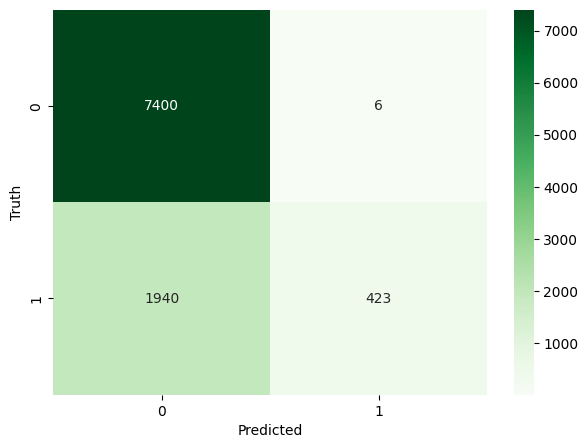

In [64]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cmd, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0, 0.5, 'True Positive Rate')

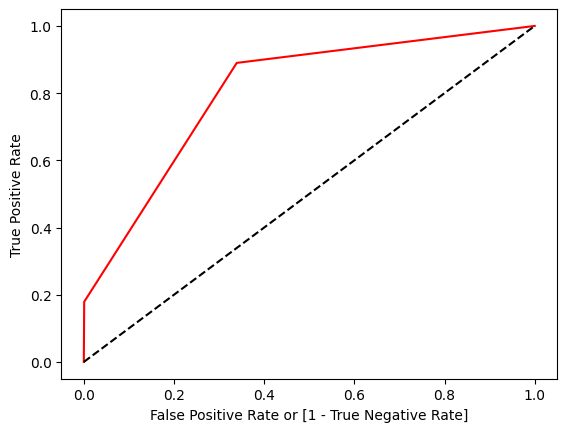

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,dt.predict_proba(x_test)[0:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')    

[Text(0.5, 0.8333333333333334, 'x[47] <= 0.5\nentropy = 0.793\nsamples = 39073\nvalue = [29749, 9324]'),
 Text(0.25, 0.5, 'x[4] <= 7055.5\nentropy = 0.343\nsamples = 21223\nvalue = [19865, 1358]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.277\nsamples = 20846\nvalue = [19850, 996]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.241\nsamples = 377\nvalue = [15, 362]'),
 Text(0.75, 0.5, 'x[4] <= 5095.5\nentropy = 0.992\nsamples = 17850\nvalue = [9884, 7966]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.97\nsamples = 16417\nvalue = [9871, 6546]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.075\nsamples = 1433\nvalue = [13, 1420]')]

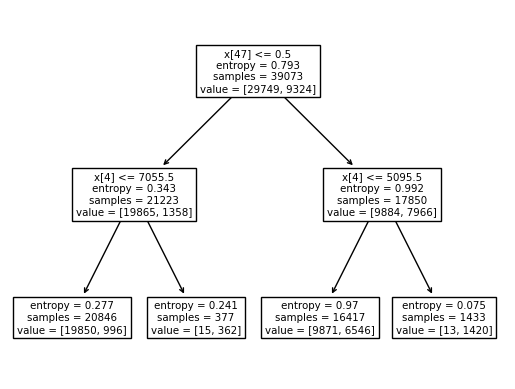

In [67]:
tree.plot_tree(dt)

In [68]:
fn=[]
for i in X.columns:
    fn.append(i)
cn=['>50K','<=50K']

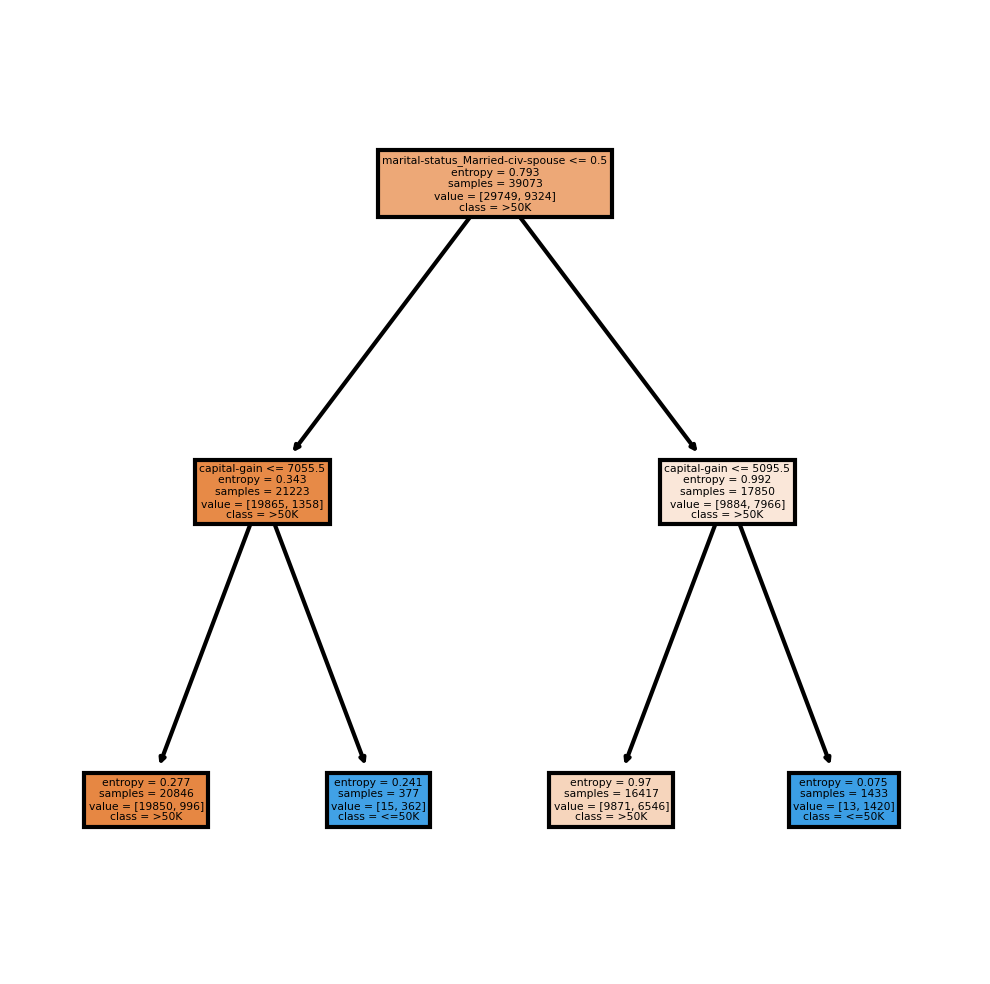

In [69]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [71]:
y_pred=rf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.8465554304432388

In [73]:
cmr=confusion_matrix(y_test,y_pred)
cmr

array([[6858,  548],
       [ 951, 1412]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

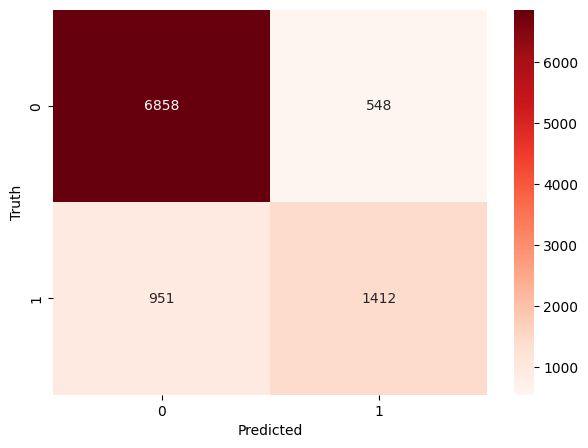

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cmr, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

## KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [82]:
y_pred = knn.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7918927218753199

In [84]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7211,  195],
       [1838,  525]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

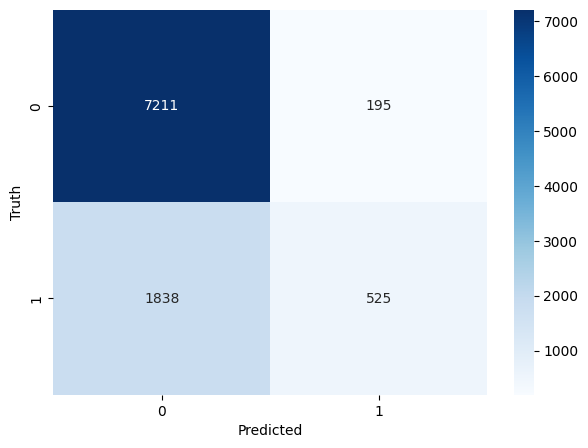

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0, 0.5, 'True Positive Rate')

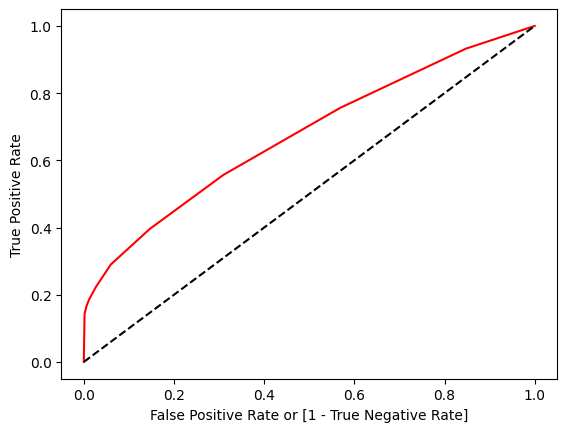

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,knn.predict_proba(x_test)[0:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')  

## K-Means

In [87]:
from sklearn.cluster import KMeans

In [88]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

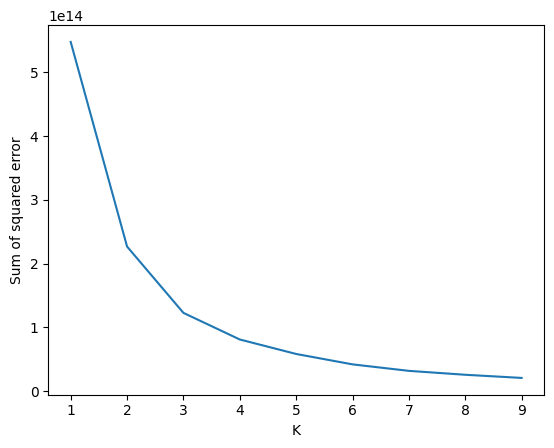

In [89]:
#ELBOW PLOT
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [91]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)

In [93]:
accuracy_score(Y,y_pred)

0.20060603578887024

## SVM

In [95]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [96]:
y_pred=svm.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred)

0.7941447435766199

In [98]:
cms=confusion_matrix(y_test,y_pred)
cms

array([[7391,   15],
       [1996,  367]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

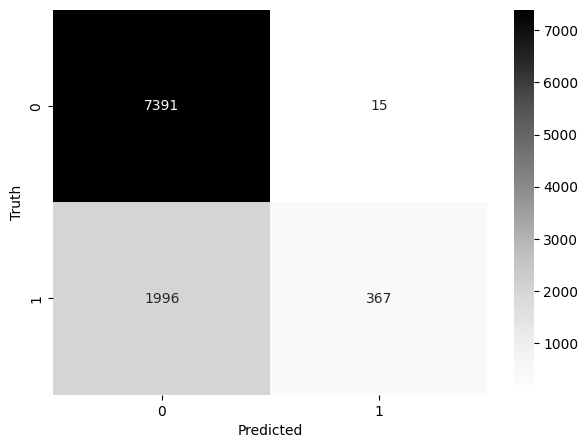

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cms, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')